In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

In [32]:
import pandas as pd 
# Read data from file 'filename.csv' 
# (in the same directory that your python process is based)
# Control delimiters, rows, column names with read_csv (see later) 
dataset = pd.read_csv("LVL9 (HARD).csv",header=0, delimiter=';') 
dataset.head()

,Chomper_Kill,Spitter_Kill,Spike_Hit,Spitter_Hit,Chomper_Hit,Death_Fall,Death_Acid,Column_Des,Box_Pushed,Key1_Pickup,Key2_Pickup,Key3_Pickup,Health_Pickup,Switch_Enabled,Quiz_Start,Correct_Ans,Wrong_Ans
0,5,0,0,0,0,2,0,1,0,1,1,1,0,1,1,3,0
1,4,0,1,0,0,1,0,1,0,1,1,1,0,1,1,3,1
2,2,0,2,0,1,0,0,1,0,1,1,0,0,1,0,0,0
3,3,0,2,0,1,0,0,1,0,1,1,0,0,1,0,0,0
4,5,0,1,0,1,0,0,1,0,1,1,1,0,1,1,3,1


In [33]:
# selection des colonnes à prendre en compte dans l'ACP
from sklearn import preprocessing
X_dataset = dataset[["Chomper_Kill","Spike_Hit","Death_Fall","Column_Des","Chomper_Hit","Key1_Pickup","Key2_Pickup","Key3_Pickup","Switch_Enabled","Quiz_Start","Correct_Ans","Wrong_Ans"]]
features = dataset.columns
# normalize the data attributes
normalized_d = preprocessing.normalize(X_dataset)
standardized_X = preprocessing.scale(normalized_d)
features

Index([u'Chomper_Kill', u'Spitter_Kill', u'Spike_Hit', u'Spitter_Hit',
       u'Chomper_Hit', u'Death_Fall', u'Death_Acid', u'Column_Des',
       u'Box_Pushed', u'Key1_Pickup', u'Key2_Pickup', u'Key3_Pickup',
       u'Health_Pickup', u'Switch_Enabled', u'Quiz_Start', u'Correct_Ans',
       u'Wrong_Ans'],
      dtype='object')

In [34]:
print(normalized_d)
# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(standardized_X)
X_scaled = std_scale.transform(standardized_X)

[[0.75377836 0.         0.30151134 ... 0.15075567 0.45226702 0.        ]
 [0.68599434 0.17149859 0.17149859 ... 0.17149859 0.51449576 0.17149859]
 [0.5547002  0.5547002  0.         ... 0.         0.         0.        ]
 ...
 [0.70710678 0.         0.         ... 0.1767767  0.53033009 0.1767767 ]
 [0.69337525 0.13867505 0.41602515 ... 0.13867505 0.41602515 0.13867505]
 [0.57735027 0.         0.57735027 ... 0.         0.         0.        ]]


In [35]:
from sklearn.cluster import KMeans
kmeans = KMeans(2,'k-means++',500,10,0)
kmeans.fit(X_scaled)
print(kmeans.cluster_centers_)
print(kmeans.labels_)

[[-1.93712892  1.28565174  1.60768897  1.12888059  0.77653706 -0.88604306
  -1.91378331 -2.67301405  0.20592911 -2.13304211 -2.37768666 -0.8633286 ]
 [ 0.25068727 -0.16637846 -0.20805387 -0.14609043 -0.10049303  0.1146644
   0.24766608  0.34591947 -0.02664965  0.27604074  0.30770063  0.11172488]]
[1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0]


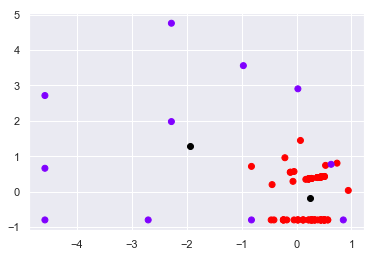

In [36]:
plt.scatter(X_scaled[:,0],X_scaled[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')

In [19]:
corrMatrix = dataset.corr()
print (corrMatrix)

                Chomper_Kill  Spitter_Kill  Spike_Hit  Spitter_Hit  \
Chomper_Kill        1.000000           NaN  -0.141640          NaN   
Spitter_Kill             NaN           NaN        NaN          NaN   
Spike_Hit          -0.141640           NaN   1.000000          NaN   
Spitter_Hit              NaN           NaN        NaN          NaN   
Chomper_Hit        -0.045188           NaN  -0.054568          NaN   
Death_Fall         -0.215358           NaN  -0.181342          NaN   
Death_Acid               NaN           NaN        NaN          NaN   
Column_Des          0.326854           NaN   0.022706          NaN   
Box_Pushed               NaN           NaN        NaN          NaN   
Key1_Pickup         0.638553           NaN  -0.081340          NaN   
Key2_Pickup         0.775926           NaN  -0.058373          NaN   
Key3_Pickup         0.812588           NaN  -0.217232          NaN   
Health_Pickup            NaN           NaN        NaN          NaN   
Switch_Enabled      

In [25]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [27]:
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
model.fit(X_scaled)
labels = model.labels_

print(labels)


[0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1]


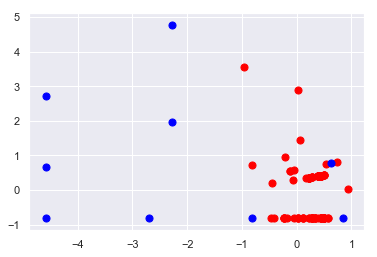

In [28]:
plt.scatter(X_scaled[labels==0, 0], X_scaled[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(X_scaled[labels==1, 0], X_scaled[labels==1, 1], s=50, marker='o', color='blue')

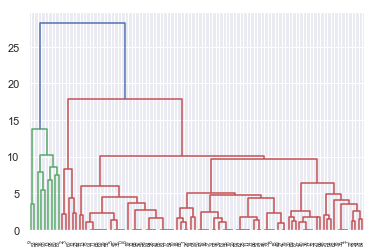

In [30]:
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))

In [37]:
classe=[1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0]
dataset['Classe'] = classe
dataset.to_csv(r'C:\Users\sofiane\Desktop\Master project/LVL9(HARD)_Classified.csv', index = None, header=True)